# Country-specific linear trends in growth
#### Christopher Callahan
#### Christopher.W.Callahan.GR@dartmouth.edu

#### Mechanics
Dependencies

In [1]:
import xarray as xr
import numpy as np
import sys
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import seaborn as sns

Data location

In [2]:
loc_panel = "../Data/Panel/"

#### Analysis

Read panel

In [3]:
y1 = 1960
y2 = 2019
panel = pd.read_csv(loc_panel+"ENSO_Growth_Panel_"+str(y1)+"-"+str(y2)+".csv",index_col=0)

Get trends for each country

In [4]:
countries = np.unique(panel.iso.values)
trends = np.full(len(countries),np.nan)

for ii in np.arange(0,len(countries),1):
    i = countries[ii]
    gr = panel.loc[panel.iso==i,"gr_pwt_frac"].values
    gr_nan = gr[~np.isnan(gr)]
    if len(gr_nan)>=10:
        time = np.arange(1,len(gr_nan)+1,1)
        trends[ii] = np.polyfit(time,gr_nan,1)[0]

Plot

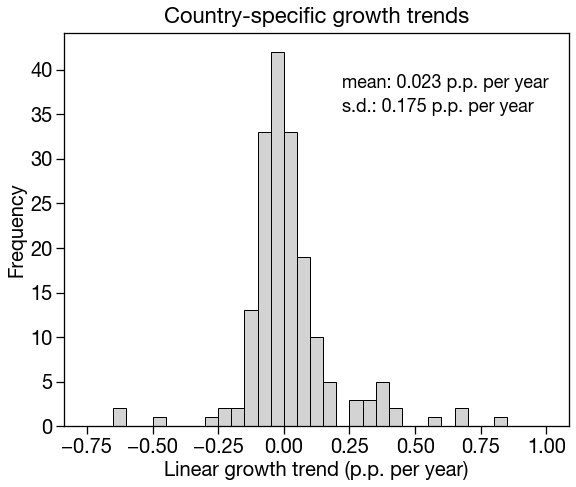

In [5]:
fig = plt.figure(figsize=(9,7))
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Helvetica Neue"]
rcParams["font.size"] = 20.0
rcParams["axes.linewidth"] = 1.3
rcParams['xtick.major.size'] = 8
rcParams['xtick.major.width'] = 1.3
rcParams['ytick.major.size'] = 8
rcParams['ytick.major.width'] = 1.3
rcParams["mathtext.default"] = "regular"

gs1 = gridspec.GridSpec(1,1)
gs1.update(left=0.12,right=0.9,top=0.9,bottom=0.12,wspace=0.2,hspace=0.28)

ax = plt.subplot(gs1[0,0])

tfs = 22

trends_nan = trends[~np.isnan(trends)]*100

plt.hist(trends_nan,edgecolor="black",facecolor="lightgray",
        bins=np.arange(-0.75,1.05,0.05))

plt.ylabel("Frequency")
plt.xlabel("Linear growth trend (p.p. per year)")
plt.title("Country-specific growth trends",fontsize=tfs,pad=10)

mn = str(np.around(np.mean(trends_nan),3))
sd = str(np.around(np.std(trends_nan),3))
plt.text(0.55,0.86,"mean: "+mn+" p.p. per year",fontsize=18,transform=ax.transAxes)
plt.text(0.55,0.8,"s.d.: "+sd+" p.p. per year",fontsize=18,transform=ax.transAxes)

plt.savefig("../Figures/FigX_Growth_Trends.pdf")
plt.show()

In [6]:
sd

'0.175'

(array([ 2.,  1.,  3., 48., 93., 16.,  7.,  6.,  2.,  2.]),
 array([-0.61123276, -0.46990639, -0.32858001, -0.18725364, -0.04592726,
         0.09539911,  0.23672549,  0.37805186,  0.51937824,  0.66070461,
         0.80203099]),
 <a list of 10 Patch objects>)

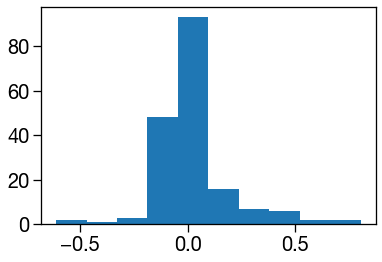

In [7]:
plt.hist(trends*100)

In [8]:
np.nanmean(trends)

0.00023148810285717565

In [9]:
np.std(trends[~np.isnan(trends)])

0.0017514485496691982